In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import pol_lagrange

As figuras que seguem ilustram um cachorro e um gr ́afico que mostra como  ́e a curva
da sua parte superior. Os pontos apresentados na tabela que segue foram selecionados para
gerar uma aproxima ̧c ̃ao para essa parte superior.

In [74]:
dados_de_entrada = np.array(
    [
        [1, 3.0],
        [2, 3.7],
        [5, 3.9],
        [6, 4.2],
        [7, 5.7],
        [8, 6.6],
        [10, 7.1],
        [13, 6.7],
        [17, 4.5],
        [20, 7.0],
        [23, 6.1],
        [24, 5.6],
        [25, 5.8],
        [27, 5.2],
        [27.7, 4.1],
        [28, 4.3],
        [29, 4.1],
        [30, 3.0],
    ]
)

## Questão 1 

In [75]:
def pol_lagrange(x_values, y_values, z):

    r = np.zeros(len(z))

    for i in range(len(x_values)):
        c = 1
        d = 1

        for j in range(len(x_values)):
            if i != j:
                c *= z - x_values[j]
                d *= x_values[i] - x_values[j]

        r += y_values[i] * (c / d)

    return r

In [76]:
interpol = np.linspace(1, 30, num=1000)

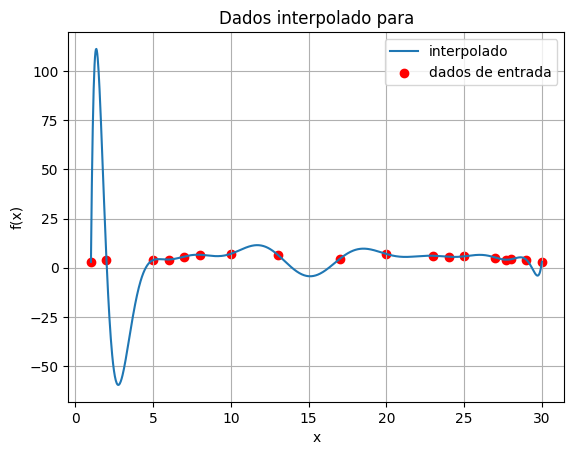

In [106]:
resultado = pol_lagrange(dados_de_entrada[:, 0], dados_de_entrada[:, 1], interpol)

plt.plot(interpol, resultado, label="interpolado")

plt.scatter(
    dados_de_entrada[:, 0], dados_de_entrada[:, 1], label="dados de entrada", color="r"
)

# Configurando os rótulos e título do gráfico
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Dados interpolado para")
plt.legend()
plt.grid()
plt.show()

## Questão 2

In [107]:
class spline:
    def __init__(self):
        self.coeff = {"a": [], "b": [], "c": [], "d": []}
        self.polinomios = {"eq": [], "dominios": []}
        pass

    def fit(self, x, y):
        n = len(x)
        self.coeff["a"] = np.array([valor for valor in y])
        h = np.array([x[k + 1] - x[k] for k in range(n - 1)])

        # Criando matriz de coeficientes do
        # sistemas de equação para c

        A = np.zeros((n, n))

        A[0, 0] = 1  # Linha inicial

        for i in range(1, n - 1):  # Linhas internas da matriz A
            A[i, i - 1] = h[i - 1]

            A[i, i] = 2 * (h[i - 1] + h[i])

            A[i, i + 1] = h[i]

        A[n - 1, n - 1] = 1  # Linha final

        # Criando matriz de resultados do
        # sistemas de equação para c

        B = np.zeros(n)

        for k in range(1, n - 1):
            B[k] = (
                3 * (self.coeff["a"][k + 1] - self.coeff["a"][k]) / h[k]
                - 3 * (self.coeff["a"][k] - self.coeff["a"][k - 1]) / h[k - 1]
            )

        self.coeff["c"] = np.linalg.solve(A, B)

        s = {}

        # calculando coeficientes b e d

        for k in range(n - 1):
            self.coeff["b"].append(
                (1 / h[k]) * (self.coeff["a"][k + 1] - self.coeff["a"][k])
                - (h[k] / 3) * (2 * self.coeff["c"][k] + self.coeff["c"][k + 1])
            )

            self.coeff["d"].append(
                (self.coeff["c"][k + 1] - self.coeff["c"][k]) / (3 * h[k])
            )

            self.polinomios["eq"].append(
                f'{self.coeff["a"][k]}{self.coeff["b"][k]:+}*(x-{x[k]}){self.coeff["c"][k]:+}*(x-{x[k]})**2{self.coeff["d"][k]:+}*(x-{x[k]})**3'
            )

            self.polinomios["dominios"].append((x[k], x[k + 1]))

    def transform(self, x):
        r = []

        for value in x:
            for eq, (min_value, max_value) in zip(
                self.polinomios["eq"], self.polinomios["dominios"]
            ):
                if value >= min_value and value <= max_value:

                    def p(x):
                        return eval(eq)

                    r.append(p(value))

        return r

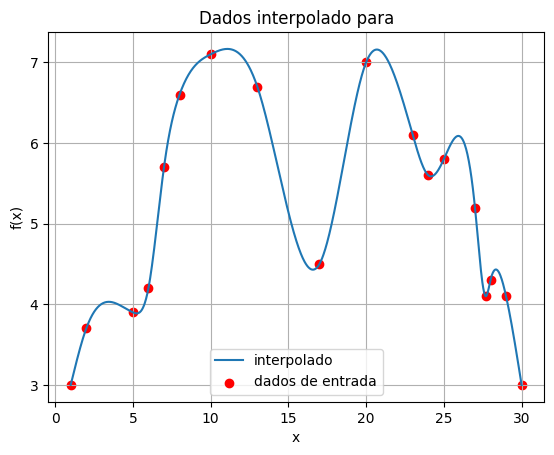

In [110]:
interpolador = spline()
polinomios = interpolador.fit(dados_de_entrada[:, 0], dados_de_entrada[:, 1])

resultado = interpolador.transform(interpol)

plt.plot(interpol, resultado, label="interpolado")

plt.scatter(
    dados_de_entrada[:, 0], dados_de_entrada[:, 1], label="dados de entrada", color="r"
)

# Configurando os rótulos e título do gráfico
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Dados interpolado para")
plt.legend()
plt.grid()
plt.show()